In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, beta

# Parameters
np.random.seed(42)
prior_alpha = 10
prior_beta = 10
n_flips = 100
n_trials = 100000
cred_level = 0.9
true_p_values = np.arange(0.05, 0.95 + 0.05, 0.05)

# Storage for results
results = []

# Simulation
for true_p in true_p_values:
    bayesian_coverage = 0
    frequentist_coverage = 0

    for _ in range(n_trials):
        heads = np.random.binomial(n_flips, true_p)

        # Frequentist confidence interval
        p_hat = heads / n_flips
        z = norm.ppf(1 - (1 - cred_level) / 2)
        se = np.sqrt(p_hat * (1 - p_hat) / n_flips)
        freq_lower = p_hat - z * se
        freq_upper = p_hat + z * se

        # Bayesian credible interval
        post_alpha = prior_alpha + heads
        post_beta = prior_beta + (n_flips - heads)
        bayes_lower = beta.ppf((1 - cred_level) / 2, post_alpha, post_beta)
        bayes_upper = beta.ppf(1 - (1 - cred_level) / 2, post_alpha, post_beta)

        # Check coverage
        if freq_lower <= true_p <= freq_upper:
            frequentist_coverage += 1
        if bayes_lower <= true_p <= bayes_upper:
            bayesian_coverage += 1

    results.append({
        "true_p": true_p,
        "frequentist_coverage": frequentist_coverage / n_trials,
        "bayesian_coverage": bayesian_coverage / n_trials
    })

# Convert to DataFrame
df = pd.DataFrame(results)

# Reshape for plotting
df_long = df.melt(id_vars="true_p", var_name="method", value_name="coverage")

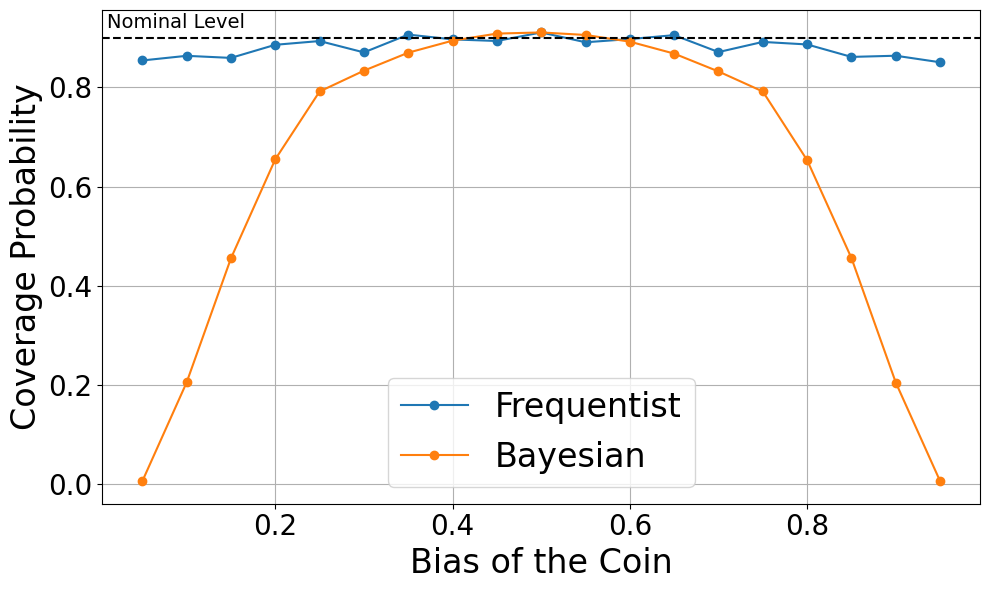

In [10]:
 #Plot
plt.figure(figsize=(10, 6))
for method in df_long['method'].unique():
    subset = df_long[df_long['method'] == method]
    plt.plot(subset['true_p'], subset['coverage'], marker='o', label=method)

plt.axhline(y=cred_level, color='black', linestyle='dashed')
plt.text(0.01, cred_level + 0.02, "Nominal Level", color='black', fontsize=14)
plt.xlabel("Bias of the Coin", fontsize=24)
plt.ylabel("Coverage Probability", fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(labels=["Frequentist", "Bayesian"], fontsize=24)
#plt.title("Coverage Probability vs. True Probability")
plt.grid(True)
plt.tight_layout()
plt.savefig("/home/martin/Documents/R/f-DP/revision/Tim_figure.png",dpi=300)
plt.show()
